# Comparison of Sorting Algorithms

**Author:** Arindam Chatterjee  
**Date:** Aug 20, 2018  
**Purpose:** To compare different sorting methodologies with respect to running time by varying input array sizes  

# Table of contents
1. [Import Libraries](#Import-Libraries)
2. [Define Sorting Algorithms Function](#sorting-algo)
    1. [Bubble Sort](#bubble)
    2. [Selection Sort](#selection)
    3. [Insertion Sort](#insertion)
    4. [Merge Sort](#merge)
    5. [Quick Sort](#quick)
    6. [Heap Sort](#heap)
    7. [Shell Sort](#shell)
    8. [Counting Sort](#counting)
    9. [Radix Sort](#radix)
    10. [Comb Sort](#comb)
    11. [Pigeonhole Sort](#pigeonhole)
    12. [Cycle Sort](#cycle)
3. [Measuring Time Complexity](#time-complexity)
    1. [Worst Case Time complexity](#worst)
    2. [Average Case Time complexity](#average)
    3. [Best Case Time complexity](#best)


# Import Libraries <a name="Import-Libraries"></a>

In [168]:
# Import Libraries
from time import time
from random import randint #For randomly picking integers between range for avg case time complexity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Define Sorting Algorithms Function <a name="sorting-algo"></a>

## 1. Bubble Sort  <a name="bubble"></a>
Bubble Sort is the simplest sorting algorithm that works by repeatedly swapping the adjacent elements if they are in wrong order.  

**Worst and Average Case Time Complexity:** $O(n^{2})$.  Worst case occurs when array is reverse sorted.

**Best Case Time Complexity:** $O(n)$. Best case occurs when array is already sorted.

**Auxiliary Space:** $O(1)$

**Boundary Cases:** Bubble sort takes minimum time (Order of n) when elements are already sorted.

**Sorting In Place:** Yes

**Stable:** Yes

Due to its simplicity, bubble sort is often used to introduce the concept of a sorting algorithm.
In computer graphics it is popular for its capability to detect a very small error (like swap of just two elements) in almost-sorted arrays and fix it with just linear complexity (2n). For example, it is used in a polygon filling algorithm, where bounding lines are sorted by their x coordinate at a specific scan line (a line parallel to x axis) and with incrementing y their order changes (two elements are swapped) only at intersections of two lines

In [98]:
# 1. Bubble Sort
def bubbleSort(arr):
    n = len(arr)    
    for i in range(n-1): # Traverse through all array elements : [0, n-1)
        swapped = False  # Optimization: checks if atleast 1 swap operation occured in inner loop
        for j in range(n-i-1):# Last i elements are already in place: [0, n-i-1)
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
                swapped = True
        if swapped == False: # If no swap op performed, then array already sorted.
            break

## 2. Selection Sort <a name="selection"></a>
The selection sort algorithm sorts an array by repeatedly finding the minimum element (considering ascending order) from unsorted part and putting it at the beginning. The algorithm maintains two subarrays in a given array.  

1. The subarray which is already sorted.  
2. Remaining subarray which is unsorted.  

In every iteration of selection sort, the minimum element (considering ascending order) from the unsorted subarray is picked and moved to the sorted subarray.  

**Time Complexity:** $O(n^{2})$ as there are two nested loops.

**Auxiliary Space:** $O(1)$
The good thing about selection sort is it never makes more than $O(n)$ swaps and can be useful when memory write is a costly operation.

**Stability :** The default implementation is not stable. However it can be made stable.  

**In Place :** Yes, it does not require extra space.


In [21]:
# 2. Selection Sort
def selectionSort(arr):
    n = len(arr) 
    for i in range(n-1): [0, n-1)   
        pos = i
        for j in range(i+1, n):# Find the minimum element in remaining unsorted array: [i+1, n) 
            if arr[j] < arr[pos]:
                pos = j                        
        arr[i], arr[pos] = arr[pos], arr[i] #put min element from remaining unsorted array into current pos

## 3. Insertion Sort <a name="insertion"></a>

**Insertion sort** is a simple sorting algorithm that builds the final sorted array one item at a time. It is much less efficient on large lists than more advanced algorithms such as quicksort, heapsort, or merge sort. However, insertion sort provides several advantages:

1. **Simple implementation:** Jon Bentley shows a three-line C version, and a five-line optimized version.  
2. **Efficient** for (quite) small data sets, much like other quadratic sorting algorithms.  
3. More efficient in practice than most other simple quadratic (i.e., $O(n^{2})$) algorithms such as selection sort or bubble sort.  
4. **Adaptive**, i.e., efficient for data sets that are already substantially sorted: the time complexity is $O(nk)$ when each element in the input is no more than k places away from its sorted position.  
5. **Stable**; i.e., does not change the relative order of elements with equal keys.  
6. **In-place**; i.e., only requires a constant amount O(1) of additional memory space.  
7. **Online**; i.e., can sort a list as it receives it.
8. **Time Complexity:** $O(n^{2})$
9. **Auxiliary Space:** $O(1)$

**Uses:**   
Insertion sort is used when number of elements is small. It can also be useful when input array is almost sorted, only few elements are misplaced in complete big array.

**What is Binary Insertion Sort?**  
We can use binary search to reduce the number of comparisons in normal insertion sort. Binary Insertion Sort find use binary search to find the proper location to insert the selected item at each iteration. In normal insertion, sort it takes O(i) (at ith iteration) in worst case. we can reduce it to O(logi) by using binary search. The algorithm as a whole still has a running worst case running time of O(n2) because of the series of swaps required for each insertion. Refer this for implementation.

When people manually sort cards in a bridge hand, most use a method that is similar to insertion sort

In [23]:
# 3. Insertion Sort
def insertionSort(arr):
    n = len(arr)     
    for i in range(1, n): #[1,n) 
        temp = arr[i]        
        j = i-1 # Shift by one place to the right, elements of arr[0..i-1], that are greater than temp
        while j >=0 and arr[j] > temp : 
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = temp

## 4. Merge Sort  <a name="merge"></a>
Merge Sort is a Divide and Conquer algorithm. It divides input array in two halves, calls itself for the two halves and then merges the two sorted halves. The merge() function is used for merging two halves. The merge(arr, l, m, r) is key process that assumes that arr[l..m] and arr[m+1..r] are sorted and merges the two sorted sub-arrays into one.

**Time Complexity:** $O(n*log(n))$ in all 3 cases (worst, average and best) as merge sort always divides the array in two halves and take linear time to merge two halves.

**Auxiliary Space:** O(n)

**Algorithmic Paradigm:** Divide and Conquer

**Sorting In Place:** No in a typical implementation

**Stable:** Yes


**Applications of Merge Sort**
1. *Merge Sort is useful for sorting linked lists in O(nLogn) time*.In case of linked lists the case is different mainly due to difference in memory allocation of arrays and linked lists. Unlike arrays, linked list nodes may not be adjacent in memory. Unlike array, in linked list, we can insert items in the middle in O(1) extra space and O(1) time. Therefore merge operation of merge sort can be implemented without extra space for linked lists.
In arrays, we can do random access as elements are continuous in memory. Let us say we have an integer (4-byte) array A and let the address of A[0] be x then to access A[i], we can directly access the memory at (x + i*4). Unlike arrays, we can not do random access in linked list. Quick Sort requires a lot of this kind of access. In linked list to access i’th index, we have to travel each and every node from the head to i’th node as we don’t have continuous block of memory. Therefore, the overhead increases for quick sort. Merge sort accesses data sequentially and the need of random access is low.

2. Used in External Sorting

In [45]:
# 4. Merge Sort
# sub-array of arr to be sorted
def mergeSort(arr,low,high):   
    if low < high:
        mid = int( low + (high-low)/2 ) #Avoids overflow error for large values of low & high  
        mergeSort(arr, low, mid) # Sort first and second halves
        mergeSort(arr, mid+1, high)
        merge(arr, low, mid, high)


# Merges two subarrays of arr[] which are arr[low..mid] & arr[mid+1..high]
def merge(arr, low, mid, high):
    n1 = mid - low + 1
    n2 = high - mid
 
    # create temp arrays
    L = [0] * (n1)
    H = [0] * (n2)
 
    # Copy data to temp arrays L[] and R[]
    L = [ arr[low+i] for i in range(n1) ]
    H = [ arr[mid+1+i] for i in range(n2) ]
 
    # Merge the temp arrays back into arr[low..high]
    i, j, k = 0, 0, low     # Initial index of first subarray, second subarray, merged subarray 
    while i < n1 and j < n2 :
        if L[i] <= H[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = H[j]
            j += 1
        k += 1
 
    # Copy the remaining elements of L[], if there are any
    while i < n1: 
        arr[k] = L[i]
        i += 1
        k += 1
 
    # Copy the remaining elements of H[], if there are any
    while j < n2: 
        arr[k] = H[j]
        j += 1
        k += 1


## 5. Quick Sort <a name="quick"></a>
Like Merge Sort, QuickSort is a Divide and Conquer algorithm. It picks an element as pivot and partitions the given array around the picked pivot. There are many different versions of quickSort that pick pivot in different ways.  
  
1. Always pick first element as pivot.  
2. Always pick last element as pivot.    
3. Pick a random element as pivot.  
4. Pick median as pivot.  

The key process in quickSort is partition(). Target of partitions is, given an array and an element x of array as pivot, put x at its correct position in sorted array and put all smaller elements (smaller than x) before x, and put all greater elements (greater than x) after x. All this should be done in linear time.

**Analysis of QuickSort**  
Time taken by QuickSort in general can be written as following.

 $T(n) = T(k) + T(n-k-1) + theta(n)$
 
The first two terms are for two recursive calls, the last term is for the partition process. k is the number of elements which are smaller than pivot.
The time taken by QuickSort depends upon the input array and partition strategy. Following are three cases.

**Worst Case:**  
The worst case occurs when the partition process always picks greatest or smallest element as pivot. If we consider above partition strategy where last element is always picked as pivot, the worst case would occur when the array is already sorted in increasing or decreasing order. Following is recurrence for worst case.

$T(n) = T(0) + T(n-1) + theta(n)$  
which is equivalent to    
 $T(n) = T(n-1) + theta(n)$  
 
The solution of above recurrence is *theta(n^{2}).*

**Best Case:** The best case occurs when the partition process always picks the middle element as pivot. Following is recurrence for best case.

$T(n) = 2T(n/2) + theta(n)$

The solution of above recurrence is $theta(nLogn)$.

**Average Case:**
To do average case analysis, we need to consider all possible permutation of array and calculate time taken by every permutation which doesn’t look easy.
We can get an idea of average case by considering the case when partition puts O(n/9) elements in one set and O(9n/10) elements in other set. Following is recurrence for this case.

 $T(n) = T(n/9) + T(9n/10) + theta(n)$  
Solution of above recurrence is also $O(nLogn)$  

Although the worst case time complexity of QuickSort is O(n2) which is more than many other sorting algorithms like Merge Sort and Heap Sort, QuickSort is faster in practice, because its inner loop can be efficiently implemented on most architectures, and in most real-world data. QuickSort can be implemented in different ways by changing the choice of pivot, so that the worst case rarely occurs for a given type of data. However, merge sort is generally considered better when data is huge and stored in external storage.

**Is QuickSort stable?**  
The default implementation is not stable. However any sorting algorithm can be made stable by considering indexes as comparison parameter.

**Why Quick Sort is preferred over MergeSort for sorting Arrays**
Quick Sort in its general form is an in-place sort (i.e. it doesn’t require any extra storage) whereas merge sort requires $O(N)$ extra storage, N denoting the array size which may be quite expensive. Allocating and de-allocating the extra space used for merge sort increases the running time of the algorithm. Comparing average complexity we find that both type of sorts have $O(NlogN)$ average complexity but the constants differ. For arrays, merge sort loses due to the use of extra $O(N)$ storage space.    

Most practical implementations of Quick Sort use randomized version. The randomized version has expected time complexity of $O(nLogn)$. The worst case is possible in randomized version also, but worst case doesn’t occur for a particular pattern (like sorted array) and randomized Quick Sort works well in practice.  
  
Quick Sort is also a cache friendly sorting algorithm as it has good locality of reference when used for arrays.  
  
Quick Sort is also tail recursive, therefore tail call optimizations is done.  
  
**Why MergeSort is preferred over QuickSort for Linked Lists?**
In case of linked lists the case is different mainly due to difference in memory allocation of arrays and linked lists. Unlike arrays, linked list nodes may not be adjacent in memory. Unlike array, in linked list, we can insert items in the middle in O(1) extra space and $O(1)$ time. Therefore merge operation of merge sort can be implemented without extra space for linked lists.  
  
In arrays, we can do random access as elements are continuous in memory. Let us say we have an integer (4-byte) array A and let the address of A[0] be x then to access A[i], we can directly access the memory at (x + i*4). Unlike arrays, we can not do random access in linked list. Quick Sort requires a lot of this kind of access. In linked list to access i’th index, we have to travel each and every node from the head to i’th node as we don’t have continuous block of memory. Therefore, the overhead increases for quick sort. Merge sort accesses data sequentially and the need of random access is low.  

In [47]:
# 5. Quick Sort
# Main Function to do Quick sort. Initially, 0,len(arr)-1 is passed as low, high
def quickSort(arr,low,high):
    if low < high:
        pi = partition(arr,low,high) # pi is partitioning index, arr[p] is now at right placd
        quickSort(arr, low, pi-1)    # Separately sort elements before partition and after partition
        quickSort(arr, pi+1, high)

# This function takes last element as pivot, places
# the pivot element at its correct position in sorted
# array, and places all smaller (smaller than pivot)
# to left of pivot and all greater elements to right
# of pivot
def partition(arr,low,high):
    i = low - 1         # index of smaller element
    pivot = arr[high]   # pivot
 
    for j in range(low,high): 
        if arr[j] <= pivot: # If current element is less than or equal to pivot                     
            i = i+1 # increment index of smaller element
            arr[i], arr[j] = arr[j], arr[i]
 
    arr[i+1],arr[high] = arr[high],arr[i+1]
    return ( i+1 ) 

## 6. HeapSort <a name="heap"></a>
Heap sort is a comparison based sorting technique based on Binary Heap data structure. It is similar to selection sort where we first find the maximum element and place the maximum element at the end. We repeat the same process for remaining element.

**What is Binary Heap?**
Let us first define a Complete Binary Tree. A complete binary tree is a binary tree in which every level, except possibly the last, is completely filled, and all nodes are as far left as possible.  

A Binary Heap is a Complete Binary Tree where items are stored in a special order such that value in a parent node is greater(or smaller) than the values in its two children nodes. The former is called as max heap and the latter is called min heap. The heap can be represented by binary tree or array.    

**Why array based representation for Binary Heap?**  
Since a Binary Heap is a Complete Binary Tree, it can be easily represented as array and array based representation is space efficient. If the parent node is stored at index I, the left child can be calculated by 2 * I + 1 and right child by 2 * I + 2 (assuming the indexing starts at 0).  

**Heap Sort Algorithm for sorting in increasing order:**  
1. Build a max heap from the input data.  
2. At this point, the largest item is stored at the root of the heap. Replace it with the last item of the heap followed by reducing the size of heap by 1. Finally, heapify the root of tree.  
3. Repeat above steps while size of heap is greater than 1.  

**How to build the heap?**  
Heapify procedure can be applied to a node only if its children nodes are heapified. So the heapification must be performed in the bottom up order.  

**Time Complexity:** Time complexity of heapify is $O(Logn)$. Time complexity of createAndBuildHeap() is $O(n)$ and overall time complexity of Heap Sort is $O(nLogn)$.

**In Place:** Heap sort is an in-place algorithm.  
**Stable:** Its typical implementation is not stable, but can be made stable.  

Heap sort algorithm has limited uses because Quicksort and Mergesort are better in practice. Nevertheless, the Heap data structure itself is enormously used. See Applications of Heap Data Structure

In [66]:
# 6. Heap Sort
# The main function to sort an array of given size
def heapSort(arr):
    n = len(arr)
 
    # Build maxheap. For descending sort order, this will be a minheap.
    #for i in range(n, -1, -1):        
    for i in reversed(range(int(n/2) - 1)):  # [n/2-1, 0]
        heapify(arr, n, i)
 
    # One by one extract elements
    #for i in reversed(range(n-1)):
    for i in range(n-1, -1, -1):           # [n-1, 0]
        arr[i], arr[0] = arr[0], arr[i]   # Move current root to end
        heapify(arr, i, 0)                # call max heapify on the reduced heap
        
# To heapify subtree rooted at index i. n is size of heap
def heapify(arr, n, i):
    largest = i  # Initialize largest as root
    l = 2 * i + 1     # left = 2*i + 1
    r = 2 * i + 2     # right = 2*i + 2
 
    # See if left child of root exists and is greater than root 
    if l < n and arr[i] < arr[l]:
        largest = l
 
    # See if right child of root exists and is greater than root
    if r < n and arr[largest] < arr[r]:
        largest = r
 
    # Change root, if needed
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]  # swap        
        heapify(arr, n, largest) # Heapify the root
 

## 7. Shell Sort <a name="shell"></a>
ShellSort is mainly a variation of Insertion Sort. In insertion sort, we move elements only one position ahead. When an element has to be moved far ahead, many movements are involved. The idea of shellSort is to allow exchange of far items. In shellSort, we make the array h-sorted for a large value of h. We keep reducing the value of h until it becomes 1. An array is said to be h-sorted if all sublists of every h’th element is sorted.

**Time Complexity:** $O(n^{2})$  

In [129]:
# 7. Shell Sort
def shellSort(arr):
    # Start with a big gap, then reduce the gap
    n = len(arr)
    gap = int(n/2)
 
    # Do a gapped insertion sort for this gap size.
    # The first gap elements a[0..gap-1] are already in gapped 
    # order keep adding one more element until the entire array
    # is gap sorted
    while gap > 0: 
        for i in range(gap,n): 
            # add a[i] to the elements that have been gap sorted
            # save a[i] in temp and make a hole at position i
            temp = arr[i]
 
            # shift earlier gap-sorted elements up until the correct
            # location for a[i] is found
            j = i
            while  j >= gap and arr[j-gap] > temp:
                arr[j] = arr[j-gap]
                j -= gap
 
            # put temp (the original a[i]) in its correct location
            arr[j] = temp
        gap = int(gap/2)

## 8. Counting Sort  <a name="counting"></a>
Counting sort is a sorting technique based on keys between a specific range. It works by counting the number of objects having distinct key values (kind of hashing). Then doing some arithmetic to calculate the position of each object in the output sequence.  

**Let us understand it with the help of an example.**  

For simplicity, consider the data in the range 0 to 9.   
Input data: 1, 4, 1, 2, 7, 5, 2  
  1. Take a count array to store the count of each unique object.  
  Index:     0  1  2  3  4  5  6  7  8  9  
  Count:     0  2  2  0   1  1  0  1  0  0  
  
  2. Modify the count array such that each element at each index   
  stores the sum of previous counts.   
  Index:     0  1  2  3  4  5  6  7  8  9  
  Count:     0  2  4  4  5  6  6  7  7  7  
  
The modified count array indicates the position of each object in the output sequence.   
   
  3. Output each object from the input sequence followed by 
  decreasing its count by 1.  
  Process the input data: 1, 4, 1, 2, 7, 5, 2. Position of 1 is 2.  
  Put data 1 at index 2 in output. Decrease count by 1 to place   
  next data 1 at an index 1 smaller than this index.  
  
**Time Complexity:** O(n+k) where n is the number of elements in input array and k is the range of input.  
**Auxiliary Space:** O(n+k)

**Points to be noted:**
1. Counting sort is efficient if the range of input data is not significantly greater than the number of objects to be sorted. Consider the situation where the input sequence is between range 1 to 10K and the data is 10, 5, 10K, 5K.
2. It is not a comparison based sorting. It running time complexity is O(n) with space proportional to the range of data.
3. It is often used as a sub-routine to another sorting algorithm like radix sort.
4. Counting sort uses a partial hashing to count the occurrence of the data object in O(1).
5. Counting sort can be extended to work for negative inputs also.
 

In [218]:
# 8. Counting Sort
# The main function that sort the given string arr[] in ascending order
# max_val = maximum number possible in arr. arr stores nos in range [0,max_val)
def countSort(arr, max_val):
 
    # The output numbers array that will have sorted arr
    output = [0 for i in range(max_val)]
 
    # Create a count array to store count of inidividul
    # numbers and initialize count array as 0
    count = [0 for i in range(max_val)]
 
    # For storing the resulting answer since the 
    # string is immutable
    ans = [0 for _ in arr]
 
    # Store count of each number
    for num in arr:
        count[num] += 1
    
    # Change count[i] so that count[i] now contains actual position of this number in output array
    for i in range(1, max_val):
        count[i] += count[i-1]
 
    # Build the output number array
    for i in range(len(arr)):
        output[ count[arr[i]]-1 ] = arr[i]
        count[ arr[i] ] -= 1
 
    # Copy the output array to arr, so that arr now contains sorted numbers
    for i in range(len(arr)):
        arr[i] = output[i]
    #print(arr)
        

## 9. Radix Sort <a name="radix"></a>

Radix sort is a non-comparative integer sorting algorithm that sorts data with integer keys by grouping keys by the individual digits which share the same significant position and value. A positional notation is required, but because integers can represent strings of characters (e.g., names or dates) and specially formatted floating point numbers, radix sort is not limited to integers.  

The lower bound for Comparison based sorting algorithm (Merge Sort, Heap Sort, Quick-Sort .. etc) is $Ω(nLogn)$, i.e., they cannot do better than $nLogn$.  
  
Counting sort is a linear time sorting algorithm that sort in $O(n+k)$ time when elements are in range from 1 to k.  
  
**What if the elements are in range from 1 to $n^{2}$?** 
We can’t use counting sort because counting sort will take $O(n^{2})$ which is worse than comparison based sorting algorithms. Can we sort such an array in linear time?
Radix Sort is the answer. The idea of Radix Sort is to do digit by digit sort starting from least significant digit to most significant digit. Radix sort uses counting sort as a subroutine to sort.

**Example:**
Original, unsorted list:  
$170, 45, 75, 90, 802, 24, 2, 66$ 

Sorting by least significant digit (1s place) gives: (Notice that we keep 802 before 2, because 802 occurred before 2 in the original list, and similarly for pairs 170 & 90 and 45 & 75.)  
$170, 90, 802, 2, 24, 45, 75, 66$  

Sorting by next digit (10s place) gives: (Notice that 802 again comes before 2 as 802 comes before 2 in the previous list.)  
$802, 2, 24, 45, 66, 170, 75, 90$  

Sorting by most significant digit (100s place) gives:  
$2, 24, 45, 66, 75, 90, 170, 802$  

**What is the running time of Radix Sort?**
Let there be d digits in input integers. Radix Sort takes $O(d*(n+b))$ time where b is the base for representing numbers, for example, for decimal system, b is 10. What is the value of d? If k is the maximum possible value, then d would be $O(log_{b}(k))$. So overall time complexity is $O((n+b) * log_{b}(k))$. Which looks more than the time complexity of comparison based sorting algorithms for a large k. Let us first limit k. Let k <= nc where c is a constant. In that case, the complexity becomes $O(nLog_{b}(n))$. But it still doesn’t beat comparison based sorting algorithms.  
What if we make value of b larger?. What should be the value of b to make the time complexity linear? If we set b as n, we get the time complexity as $O(n)$. In other words, we can sort an array of integers with range from 1 to nc if the numbers are represented in base n (or every digit takes $log_{2}(n)$ bits).

**Is Radix Sort preferable to Comparison based sorting algorithms like Quick-Sort?**
If we have $log_{2}n$ bits for every digit, the running time of Radix appears to be better than Quick Sort for a wide range of input numbers. The constant factors hidden in asymptotic notation are higher for Radix Sort and Quick-Sort uses hardware caches more effectively. Also, Radix sort uses counting sort as a subroutine and counting sort takes extra space to sort numbers.

In [223]:
# 9. Radix Sort
# Main Method to do Radix Sort. Takes help of Counting sort method too
def radixSort(arr):    
    max1 = max(arr) # Find the maximum number to know number of digits
 
    # Do counting sort for every digit. Note that instead
    # of passing digit number, exp is passed. exp is 10^i
    # where i is current digit number
    exp = 1
    while max1/exp > 0:
        countingSort(arr,exp)
        exp *= 10

# A function to do counting sort of arr[] according to
# the digit represented by exp.
def countingSort(arr, exp1):
 
    n = len(arr)
 
    # The output array elements that will have sorted arr
    output = [0] * (n)
 
    # initialize count array as 0
    count = [0] * (10)
 
    # Store count of occurrences in count[]
    for i in range(0, n):
        index = (arr[i]/exp1)
        count[ int((index)%10) ] += 1
 
    # Change count[i] so that count[i] now contains actual
    #  position of this digit in output array
    for i in range(1,10):
        count[i] += count[i-1]
 
    # Build the output array
    i = n-1
    while i>=0:
        index = (arr[i]/exp1)
        output[ count[ int((index)%10) ] - 1] = arr[i]
        count[ int((index)%10) ] -= 1
        i -= 1
 
    # Copying the output array to arr[],
    # so that arr now contains sorted numbers
    i = 0
    for i in range(0,len(arr)):
        arr[i] = output[i]        

## 10. Comb Sort <a name="comb"></a>  
Comb Sort is mainly an improvement over Bubble Sort. Bubble sort always compares adjacent values. So all inversions are removed one by one. Comb Sort improves on Bubble Sort by using gap of size more than 1. The gap starts with a large value and shrinks by a factor of 1.3 in every iteration until it reaches the value 1. Thus Comb Sort removes more than one inversion counts with one swap and performs better than Bublle Sort.

The shrink factor has been empirically found to be 1.3 (by testing Combsort on over 200,000 random lists) [Source: Wiki]

Although, it works better than Bubble Sort on average, worst case remains O(n2).

Below is the implementation.

In [230]:
# 10. Comb Sort
# Function to sort arr[] using Comb Sort
def combSort(arr):
    n = len(arr)    
    gap = n        # Initialize gap    
    swapped = True # Initialize swapped as true to make sure that loop runs
 
    # Keep running while gap is more than 1 and last iteration caused a swap
    while gap !=1 or swapped == True:        
        gap = getNextGap(gap) # Find next gap
 
        # Initialize swapped as false so that we can check if swap happened or not
        swapped = False
 
        # Compare all elements with current gap
        for i in range(0, n-gap):
            if arr[i] > arr[i + gap]:
                arr[i], arr[i + gap] = arr[i + gap], arr[i]
                swapped = True
                
# To find next gap from current
def getNextGap(gap):    
    gap = gap / 1.3 # Shrink gap by Shrink factor
    if gap < 1:
        return 1
    return int(gap)

## 11. Pigeonhole Sort  <a name="pigeonhole"></a>
Pigeonhole sorting is a sorting algorithm that is suitable for sorting lists of elements where the number of elements and the number of possible key values are approximately the same.
It requires O(n + Range) time where n is number of elements in input array and ‘Range’ is number of possible values in array.

**Working of Algorithm :**

1. Find minimum and maximum values in array. Let the minimum and maximum values be ‘min’ and ‘max’ respectively. Also find range as ‘max-min-1’.  
2. Set up an array of initially empty “pigeonholes” the same size as of the range.
3. Visit each element of the array and then put each element in its pigeonhole. An element arr[i] is put in hole at index arr[i] – min.  
4. Start the loop all over the pigeonhole array in order and put the elements from non- empty holes back into the original array.  
  
**Comparison with Counting Sort :**  
It is similar to counting sort, but differs in that it “moves items twice: once to the bucket array and again to the final destination “.  

Pigeonhole sort has limited use as requirements are rarely met. For arrays where range is much larger than n, bucket sort is a generalization that is more efficient in space and time.

In [250]:
# 11. Pigeonhole Sort
# source code : "https://en.wikibooks.org/wiki/
def pigeonholeSort(arr):
    # size of range of values in the list (ie, number of pigeonholes we need)
    val_min = min(arr)
    val_max = max(arr)
    size = val_max - val_min + 1
 
    # our list of pigeonholes
    holes = [0] * size
 
    # Populate the pigeonholes.
    for x in arr:
        assert type(x) is int, "integers only please"
        holes[x - val_min] += 1
 
    # Put the elements back into the array in order.
    i = 0
    for count in range(size):
        while holes[count] > 0:
            holes[count] -= 1
            arr[i] = count + val_min
            i += 1

## 12. Cycle Sort <a name="cycle"></a>
Cycle sort is an in-place sorting Algorithm, unstable sorting algorithm, a comparison sort that is theoretically optimal in terms of the total number of writes to the original array.  

1. It is optimal in terms of number of memory writes. It minimizes the number of memory writes to sort (Each value is either written zero times, if it’s already in its correct position, or written one time to its correct position.)  
2. It is based on the idea that array to be sorted can be divided into cycles. Cycles can be visualized as a graph. We have n nodes and an edge directed from node i to node j if the element at i-th index must be present at j-th index in the sorted array.  

We one by one consider all cycles. We first consider the cycle that includes first element. We find correct position of first element, place it at its correct position, say j. We consider old value of arr[j] and find its correct position, we keep doing this till all elements of current cycle are placed at correct position, i.e., we don’t come back to cycle starting point.

**Explanation :**  

 arr[] = {10, 5, 2, 3}  
 index =  0   1   2   3  
cycle_start = 0   
item = 10 = arr[0]  
  
Find position where we put the item    
pos = cycle_start  
while (arr[i] < item)    
    pos++;  
  
We put 10 at arr[3] and change item to   
old value of arr[3].  
arr[] = {10, 5, 2, 10}   
item = 3   
  
Again rotate rest cycle that start with index '0'   
Find position where we put the item = 3   
we swap item with element at arr[1] now   
arr[] = {10, 3, 2, 10}   
item = 5  
  
Again rotate rest cycle that start with index '0' and item = 5   
we swap item with element at arr[2].  
arr[] = {10, 3, 5, 10 }   
item = 2  
  
Again rotate rest cycle that start with index '0' and item = 2  
arr[] = {2, 3,  5, 10}    
  
Above is one iteration for cycle_stat = 0.  
Repeat above steps for cycle_start = 1, 2, ..n-2  


**Time Complexity :** $O(n^{2})$    
**Worst Case :** $O(n^{2})$  
**Average Case:** $O(n^{2})$  
**Best Case :** $O(n^{2})$  

*This sorting algorithm is best suited for situations where memory write or swap operations are costly.*

In [245]:
# 12. Cycle sort
def cycleSort(arr):
    #writes = 0
    
    # Loop through the array to find cycles to rotate.
    for cycleStart in range(0, len(arr) - 1):
        item = arr[cycleStart]
     
        # Find where to put the item.
        pos = cycleStart
        for i in range(cycleStart + 1, len(arr)):
            if arr[i] < item:
                pos += 1

        # If the item is already there, this is not a cycle.
        if pos == cycleStart:
            continue

        # Otherwise, put the item there or right after any duplicates.
        while item == arr[pos]:
            pos += 1
        arr[pos], item = item, arr[pos]
        #writes += 1

        # Rotate the rest of the cycle.
        while pos != cycleStart:

            # Find where to put the item.
            pos = cycleStart
            for i in range(cycleStart + 1, len(arr)):
                if arr[i] < item:
                    pos += 1

            # Put the item there or right after any duplicates.
            while item == arr[pos]:
                pos += 1
            arr[pos], item = item, arr[pos]
            #writes += 1
   
    #return writes

In [283]:
#Testing individual sort
'''
#arr = [i for i in reversed(range(40))]
#print(arr)
#countSort(arr, 20)
#radixSort(arr)
#combSort(arr)
#pigeonhole_sort(arr)
#cycleSort(arr)
#print(arr)
'''

# Measuring Time Complexity <a name="time-complexity"></a>

In [251]:
sort_list = [bubbleSort, selectionSort, insertionSort, mergeSort, 
             quickSort, heapSort, shellSort, countSort, 
             radixSort, combSort, pigeonholeSort, cycleSort]
n_sort = len(sort_list) #Number of sorting algorithms used = 12

In [265]:
# Takes an array & a sort function and returns the execution time of the run.
def sort_driver(arr, sort):
    new_arr = arr.copy()
    start = time()
    if sort in [mergeSort, quickSort]:
        sort(new_arr, 0, len(new_arr)-1)
    elif sort == countSort:
        sort(new_arr, max_input_size+1)
    else:
        sort(new_arr)
    exec_time = time() - start
    return exec_time

In [290]:
def plotGraph(df, msg):
    # plotting Worst Case Time Complexity graphs
    plt.figure(figsize=(15,15))
    plt.xlabel('Array Size')
    plt.ylabel('Execution Time')
    plt.title('Sort Algorithms Execution Time: {} complexity'.format(msg))
    plt.grid(True)
    plt.plot( df['arraySize'], df['bubbleSort'] , 'red')  
    plt.plot( df['arraySize'], df['selectionSort'] , 'green') 
    plt.plot( df['arraySize'], df['insertionSort'] , 'blue') 
    plt.plot( df['arraySize'], df['mergeSort'] , 'cyan') 
    plt.plot( df['arraySize'], df['quickSort'] , 'yellow') 
    plt.plot( df['arraySize'], df['heapSort'] , 'magenta') 
    plt.plot( df['arraySize'], df['shellSort'] , 'indigo')    
    plt.plot( df['arraySize'], df['countSort'] , 'lime') 
    #plt.plot( df['arraySize'], df['radixSort'] , 'olive') #Radix sort takes excessive time & skews graph
    plt.plot( df['arraySize'], df['combSort'] , 'orange')
    plt.plot( df['arraySize'], df['pigeonholeSort'] , 'indigo')
    plt.plot( df['arraySize'], df['cycleSort'] , 'grey')
    plt.legend()

## 1. Worst Case Time complexity <a name="worst"></a>

In [277]:
max_input_size = 1000
total_arr = [i for i in reversed(range(max_input_size))] # [n,n-1,..,2,1]

In [287]:
iterations = int(max_input_size / 10)      # stepSize=10

# Will store Sl,arraySize, exec times for 12 types of sort algos used. Hence total 2+12=14
results = np.zeros((iterations, 2 + n_sort)) 

c=0
for i in range(10, max_input_size+1, 10): #10, 20, 30, ... max_input_size
    arr = total_arr[0:i]
    results[c][0] = c+1 # Sl
    results[c][1] = i # Array Size
    #print('Processing Size: {}'.format(i))
    
    for j in range(n_sort):
        exec_time = sort_driver(arr, sort_list[j])
        results[c][j+2] = exec_time
        
    c+=1

columns = ['Sl', 'arraySize', 'bubbleSort', 'selectionSort', 'insertionSort', 'mergeSort', 
           'quickSort', 'heapSort', 'shellSort', 'countSort', 
           'radixSort', 'combSort', 'pigeonholeSort', 'cycleSort']

results_df = pd.DataFrame( data=results[0:,0:], 
                                  index=results[0:,0].astype(np.uint16),
                                  columns=columns)
results_df['Sl'] = results_df['Sl'].astype(np.uint16)
results_df['arraySize'] = results_df['arraySize'].astype(np.uint16)   

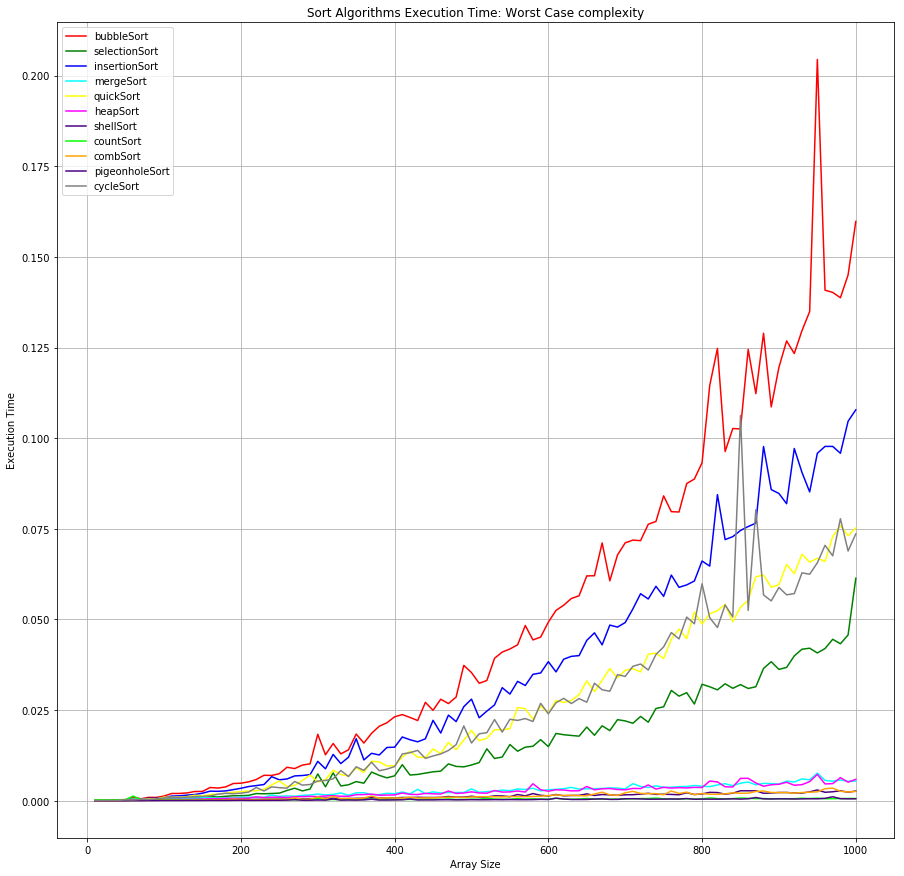

In [291]:
plotGraph(results_df, 'Worst Case')

From the graph we see that in the worst case, quick sort is $O(n^{2})$ hence performs much worse. 
Of the $O(n^{2})$ algorithms, selection sort is the best. 
The Performance of $O(nlogn)$ & lesser complexity algorithms are comparable.

## 2. Average Case Time complexity <a name="average"></a>

In [280]:
iterations = int(max_input_size / 10)      # stepSize=10

# Will store Sl,arraySize, exec times for 12 types of sort algos used. Hence total 2+12=14
results_avg = np.zeros((iterations, 2 + n_sort)) 

c=0
for i in range(10, max_input_size+1, 10): #10, 20, 30, ... max_input_size
    arr = [randint(1, max_input_size) for _ in range(i)] #select random integers between [1,max_input_size]
    results_avg[c][0] = c+1 # Sl
    results_avg[c][1] = i # Array Size
    #print('Processing Size: {}'.format(i))
    
    for j in range(n_sort):
        exec_time = sort_driver(arr, sort_list[j])
        results_avg[c][j+2] = exec_time
        
    c+=1

columns = ['Sl', 'arraySize', 'bubbleSort', 'selectionSort', 'insertionSort', 'mergeSort', 
           'quickSort', 'heapSort', 'shellSort', 'countSort', 
           'radixSort', 'combSort', 'pigeonholeSort', 'cycleSort']

results_avg_df = pd.DataFrame( data=results_avg[0:,0:], 
                                  index=results_avg[0:,0].astype(np.uint16),
                                  columns=columns)
results_avg_df['Sl'] = results_avg_df['Sl'].astype(np.uint16)
results_avg_df['arraySize'] = results_avg_df['arraySize'].astype(np.uint16)   

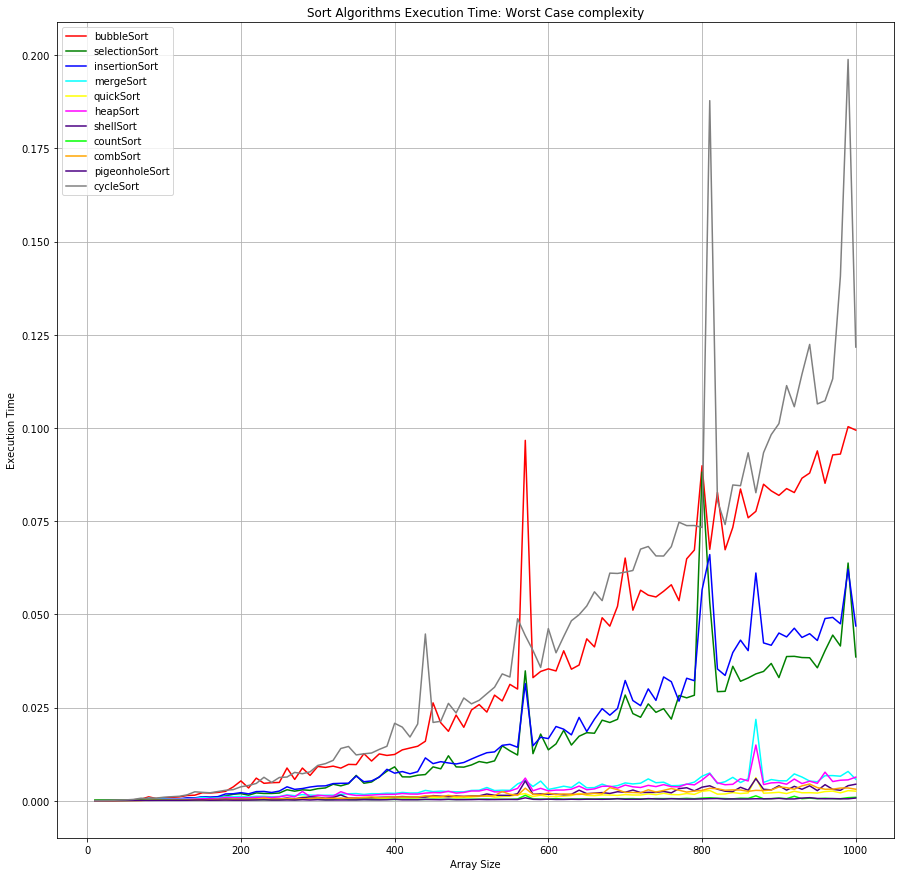

In [292]:
plotGraph(results_avg_df, 'Worst Case')

Quick Sort shines as the fastest algorithms with the exception of bucket based sort algorithms count & pigeonshole Sort which though faster at O(n) still have tight constraint on numbers allowed within range & additional space complexity.

Selection Sort is still better than both Bubble & Insertion Sort.

## 3. Best Case Time complexity <a name="best"></a>

In [293]:
max_input_size = 1000
total_arr = [i for i in range(max_input_size)] 

In [294]:
iterations = int(max_input_size / 10)      # stepSize=10

# Will store Sl,arraySize, exec times for 12 types of sort algos used. Hence total 2+12=14
results = np.zeros((iterations, 2 + n_sort)) 

c=0
for i in range(10, max_input_size+1, 10): #10, 20, 30, ... max_input_size
    arr = total_arr[0:i]
    results[c][0] = c+1 # Sl
    results[c][1] = i # Array Size
    #print('Processing Size: {}'.format(i))
    
    for j in range(n_sort):
        exec_time = sort_driver(arr, sort_list[j])
        results[c][j+2] = exec_time
        
    c+=1

columns = ['Sl', 'arraySize', 'bubbleSort', 'selectionSort', 'insertionSort', 'mergeSort', 
           'quickSort', 'heapSort', 'shellSort', 'countSort', 
           'radixSort', 'combSort', 'pigeonholeSort', 'cycleSort']

results_best_df = pd.DataFrame( data=results[0:,0:], 
                                  index=results[0:,0].astype(np.uint16),
                                  columns=columns)
results_best_df['Sl'] = results_best_df['Sl'].astype(np.uint16)
results_best_df['arraySize'] = results_best_df['arraySize'].astype(np.uint16) 

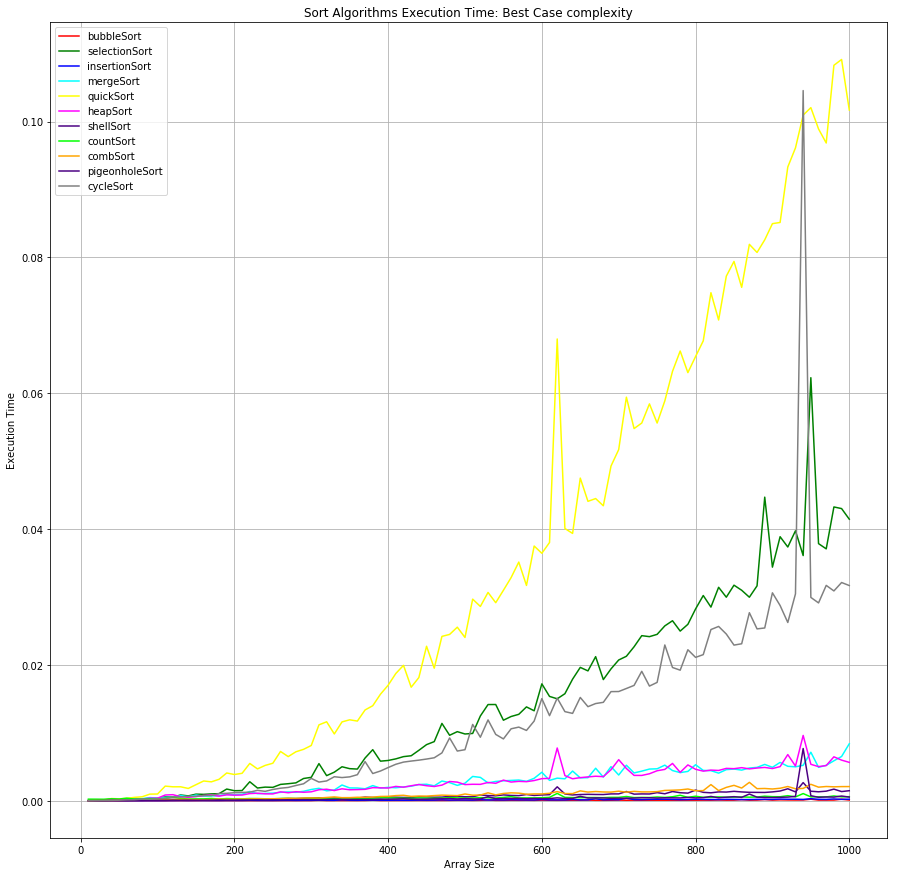

In [295]:
plotGraph(results_best_df, 'Best Case')

Due to optimization (ie: inclusion of *swapped* boolean flag), Bubble sort will run in O(n) time with only 1 outer iteration & hence will be 1 of the fastest. 

The Sorting algorithm having consistent behavior in all 3 cases is Selection Sort.

Quick Sort performs the worst as it still goes through with its pivot & partition operations.